**課題12-1**　次のサンプルコードを実行し，パラメトリック表現で表現された図形（円）がグラフとして表示できることを確認しなさい。また，このサンプルを書き換えて，次の曲線を描きなさい。  
  
１）らせん：　$x=t\cos(t), 　y=t\sin(t)　 (0≤t≤4π)$  
２）アステロイド：　$x=\cos^3⁡(t),　y=\sin^3 (t)　(0≤t<2π)$  
３）サイクロイド：　$x=t-2\sin⁡(t),　y=1-2\cos⁡(t)　 (-3π≤t≤3π)$  



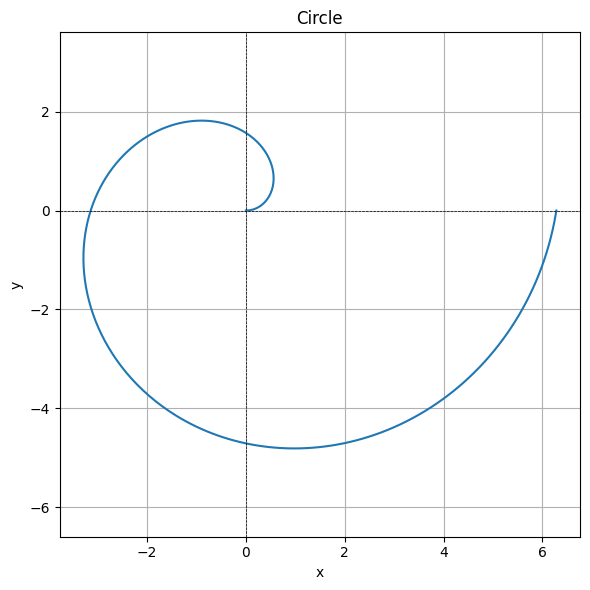

In [3]:
# 必要なライブラリをインポート
# numpy: 数値計算用のライブラリで配列操作や数学関数を提供
# matplotlib.pyplot: データの可視化用ライブラリでグラフ描画に関する各種機能を提供
import numpy as np
import matplotlib.pyplot as plt

# パラメトリック曲線を描画する関数
def plot_curve(x, y, title):
    plt.figure(figsize=(6, 6))
    plt.plot(x, y, label=title)
    plt.axhline(0, color="black", linewidth=0.5, linestyle="--")  # x軸
    plt.axvline(0, color="black", linewidth=0.5, linestyle="--")  # y軸
    plt.xlabel("x")
    plt.ylabel("y")
    plt.axis('equal')  # スケールを同じにする
    plt.grid()
    plt.title(title)
    plt.tight_layout()
    plt.show()

# パラメトリック曲線のデータ生成
# 円: 0 から 2π を 500 分割して等間隔の角度を生成
t = np.linspace(0, 2 * np.pi, 500)  # np.linspace で範囲内の値を生成
x = t * np.cos(t)   # x座標 x = cos(t)
y = t * np.sin(t)   # y座標 y = sin(t)
plot_curve(x, y, "Circle")

**課題12-2**　次のサンプルコードを実行し，２次のベジェ曲線を表示できることを確認しなさい。また，制御点の座標を変えることで曲線の形状が変わることを確認しなさい。

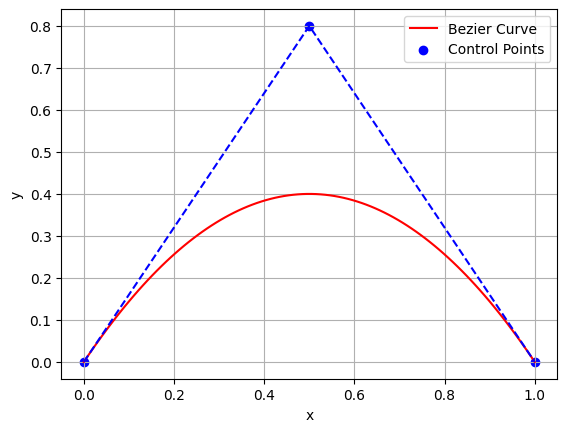

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# 2次ベジェ曲線を描く関数
def bezier_curve(q0, q1, q2, steps=100):
    t = np.linspace(0, 1, steps).reshape(-1, 1)  # tを列ベクトルに変換
    q0, q1, q2 = np.array(q0), np.array(q1), np.array(q2)  # 制御点をNumPy配列に変換
    curve = (1 - t)**2 * q0 + 2 * (1 - t) * t * q1 + t**2 * q2  # 2次ベジェ曲線の計算
    return curve[:, 0], curve[:, 1]  # x座標とy座標を返す

# 制御点の定義
q0 = [0.0, 0.0]    # 始点
q1 = [0.5, 0.8]
q2 = [1.0, 0.0]    # 終点

# ベジェ曲線の計算
px, py = bezier_curve(q0, q1, q2)

# グラフ描画
plt.plot(px, py, label="Bezier Curve", color="red")  # 曲線
plt.scatter(*zip(q0, q1, q2), color="blue", label="Control Points")  # 制御点
plt.plot(*zip(q0, q1, q2), linestyle="--", color="blue")  # 制御点を点線で結ぶ
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

**〇課題12-3**　課題12-2のサンプルコードを，３次のベジェ曲線を表示できるように書き換えなさい。また，制御点の座標を変えることで曲線の形状が変わることを確認しなさい。

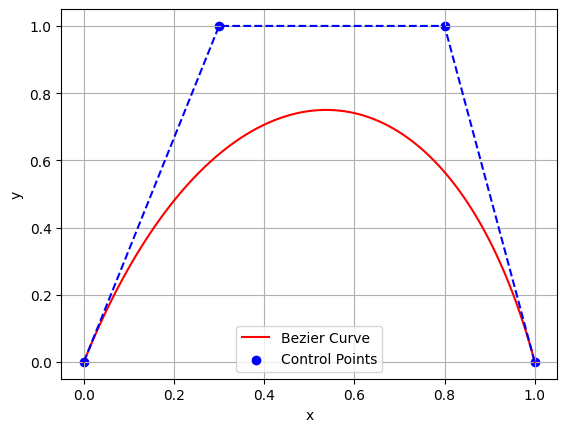

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# 2次ベジェ曲線を描く関数
def bezier_curve(q0, q1, q2, q3, steps=100):
    t = np.linspace(0, 1, steps).reshape(-1, 1)  # tを列ベクトルに変換
    q0, q1, q2 ,q3= np.array(q0), np.array(q1), np.array(q2) ,np.array(q3) # 制御点をNumPy配列に変換
    curve = (1 - t)**3 * q0 + 3 * t  * (1 - t)**2 * q1 + 3 * t**2 * (1-t) * q2 + t**3* q3 # n=3のベジェ曲線定義
    return curve[:, 0], curve[:, 1]  # x座標とy座標を返す

# 制御点の定義
q0 = [0.0, 0.0]    # 始点
q1 = [0.3, 1]
q2 = [0.8, 1]    
q3 = [1.0, 0.0]    # 終点

# ベジェ曲線の計算
px, py = bezier_curve(q0, q1, q2, q3)

# グラフ描画
plt.plot(px, py, label="Bezier Curve", color="red")  # 曲線
plt.scatter(*zip(q0, q1, q2,q3), color="blue", label="Control Points")  # 制御点
plt.plot(*zip(q0, q1, q2,q3), linestyle="--", color="blue")  # 制御点を点線で結ぶ
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

**課題12-4**　次のサンプルコードを実行し，読み込んだ画像にアフィン変換（平行移動，拡大・縮小）を適用した画像を表示できることを確認しなさい。

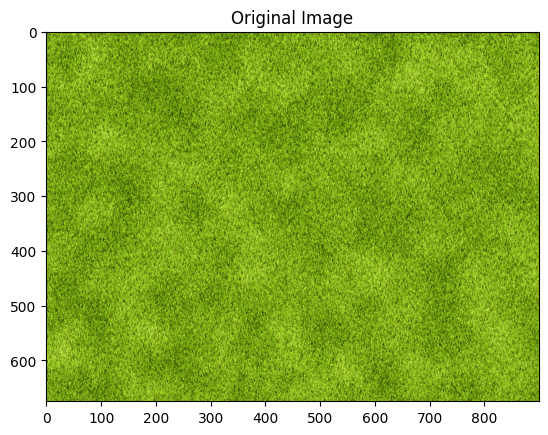

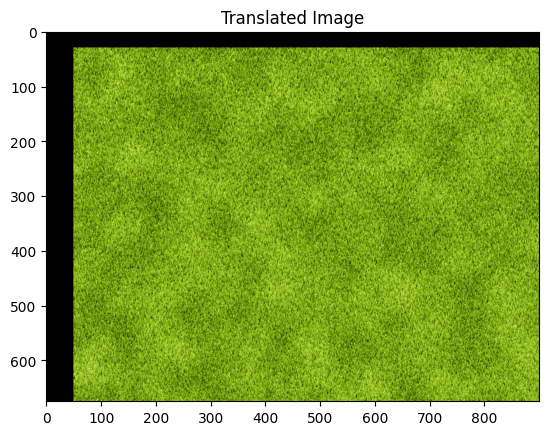

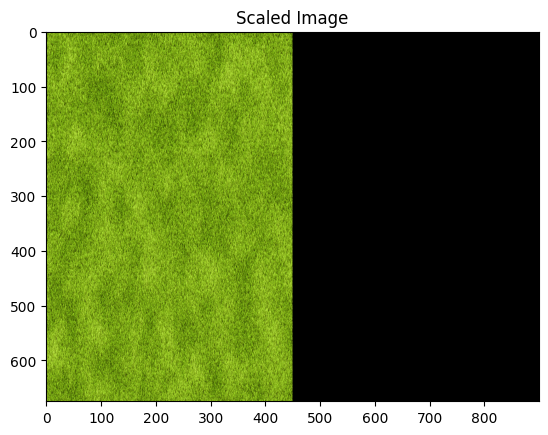

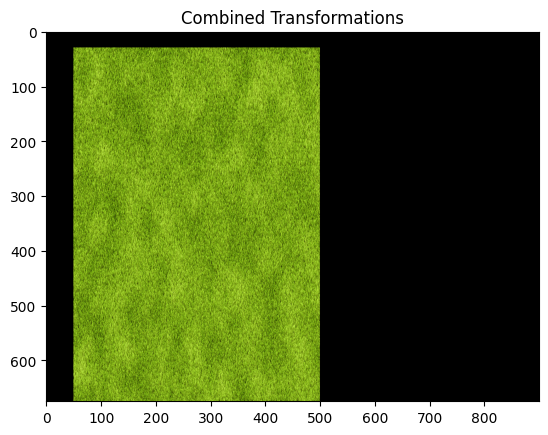

In [22]:
import numpy as np               # 数値計算や配列操作を行うためのライブラリ
from PIL import Image            # 画像の読み込み・保存・変換・加工を行うライブラリ
import matplotlib.pyplot as plt  # 画像やデータの可視化を行うためのライブラリ
# from google.colab import files   # Google Colab上でファイルをアップロード
import io                        # バイトストリームからデータを読み込むためのライブラリ

# # 画像のアップロード
# uploaded = files.upload()  # ユーザーがローカルから画像をアップロード

# # アップロードした画像を読み込む
# for filename in uploaded.keys():
#     img = Image.open(io.BytesIO(uploaded[filename]))  # アップロードした画像を開く
#     img = img.convert("RGB")  # 画像をRGB形式に変換
#     break

# 画像の読み込み（サンプル画像を使用する場合）
img = Image.open("sample.jpg").convert("RGB")

# 画像を表示
def show_image(img, title):
    """
    img: 表示する画像 (PIL Imageオブジェクト)
    title: 画像のタイトル
    """
    plt.imshow(img)   # 画像を表示
    plt.title(title)  # タイトルを設定
    plt.axis('on')    # 軸を表示にする
    plt.show()        # 表示

# 元画像を表示
show_image(img, "Original Image")

# 画像をNumPy配列に変換
img_array = np.array(img)         # 画像をNumPy形式に変換
rows, cols = img_array.shape[:2]  # 画像の行数と列数を取得

### 平行移動
def translate_image(tx, ty):
    """
    tx: x方向への移動距離 (正の値は右方向)
    ty: y方向への移動距離 (正の値は下方向)
    """
    # 平行移動のアフィン変換行列を定義
    trans_matrix = np.array([[1, 0, tx],
                             [0, 1, ty],
                             [0, 0, 1]])
    return trans_matrix

### 拡大・縮小
def scale_image(sx, sy):
    """
    sx: x方向のスケール倍率
    sy: y方向のスケール倍率
    """
    # 拡大・縮小のアフィン変換行列を定義
    trans_matrix = np.array([[sx, 0, 0],
                             [0, sy, 0],
                             [0, 0, 1]])
    return trans_matrix

### アフィン変換の適用
def apply_affine_transform(img, matrix):
    """
    img: 入力画像 (NumPy配列)
    matrix: 3x3 アフィン変換行列
    """
    img_pil = Image.fromarray(img)  # NumPy配列をPIL画像に変換

    # PILに渡すため、行列の逆数を考慮
    inverse_matrix = np.linalg.inv(matrix)  # 逆行列を計算
    affine_params = inverse_matrix[:2].flatten()  # 上2行をフラット化

    # アフィン変換を適用
    return img_pil.transform(
        img_pil.size,        # 画像サイズを指定
        Image.AFFINE,        # アフィン変換を指定
        data=affine_params,  # 修正済みの変換行列データを渡す
        resample=Image.BICUBIC  # バイキュービック補間を使用
    )

### 複数の変換を組み合わせて適用
def combine_transforms(img, transforms):
    """
    img: 入力画像 (NumPy配列)
    transforms: アフィン変換行列のリスト
    """
    combined_matrix = np.eye(3)  # 単位行列から開始
    for transform in transforms:
        combined_matrix = np.dot(combined_matrix, transform)  # 変換行列を順次掛け合わせ
    return apply_affine_transform(img, combined_matrix)       # 結果の変換を適用


# 変換行列の算出
tra_matrix = translate_image(50, 30)  # 平行移動
scale_matrix = scale_image(0.5, 1)    # 拡大

# アフィン変換の適用
# 平行移動（単独）
tra_img = combine_transforms(img_array, [tra_matrix])
show_image(tra_img, "Translated Image")
# 拡大（単独）
scale_img = combine_transforms(img_array, [scale_matrix])
show_image(scale_img, "Scaled Image")

# 複数の変換の組み合わせ（変換行列は行列の掛け算順序に並べる，最初が右，最後が左）
combined_img = combine_transforms(img_array, [tra_matrix, scale_matrix])
show_image(combined_img, "Combined Transformations")


**〇課題12-5**　課題12-4のサンプルコードを，回転，せん断の変換も適用できるようにコードを書き換えなさい。また，画像に次の変換を適用し変換後の画像を表示しなさい。  
１）画像を 45°回転させる  
２）画像を x方向 に30°のせん断を適用する  
３）画像を次の順番で変換する  
　　① x方向に2倍，y方向に3倍拡大する  
　　② 90°回転する  
　　③ x方向に+30，y方向に+50 平行移動する  


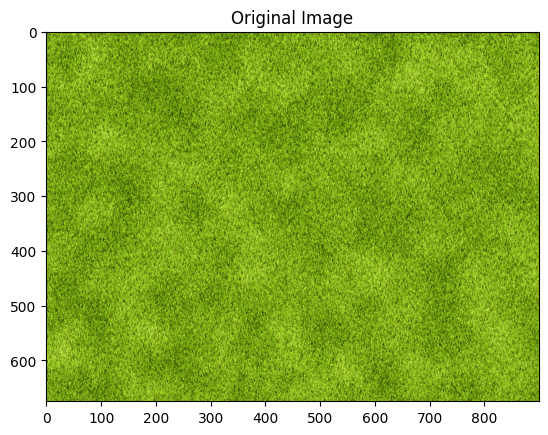

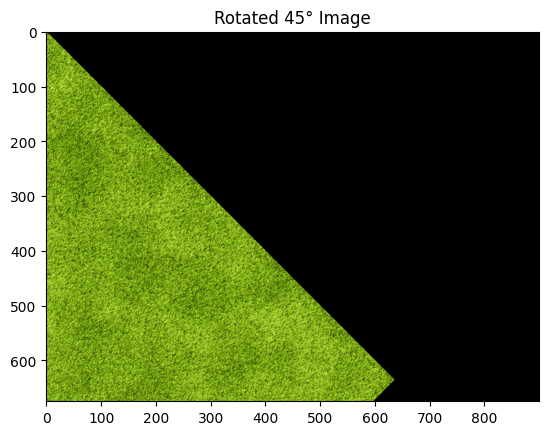

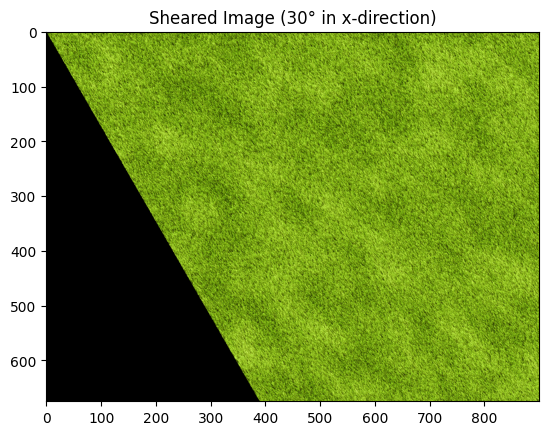

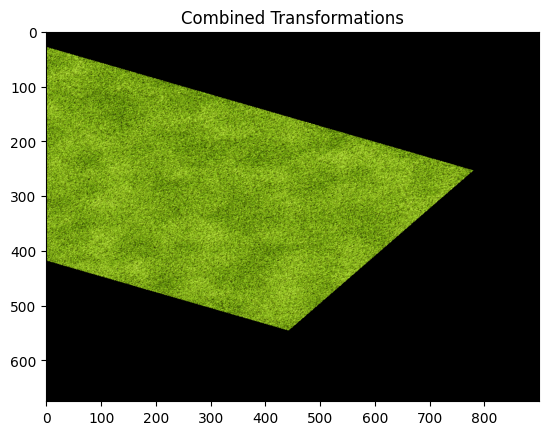

In [23]:
import numpy as np               # 数値計算や配列操作を行うためのライブラリ
from PIL import Image            # 画像の読み込み・保存・変換・加工を行うライブラリ
import matplotlib.pyplot as plt  # 画像やデータの可視化を行うためのライブラリ
import io                        # バイトストリームからデータを読み込むためのライブラリ

# 画像の読み込み（サンプル画像を使用する場合）
img = Image.open("sample.jpg").convert("RGB")

# 画像を表示
def show_image(img, title):
    plt.imshow(img)
    plt.title(title)
    plt.axis("on")
    plt.show()

# 元画像を表示
show_image(img, "Original Image")

# 画像をNumPy配列に変換
img_array = np.array(img)

### 回転
def rotate_image(theta):
    """
    theta: 回転角度 (度単位、反時計回りが正)
    """
    rad = np.deg2rad(theta)  # ラジアンに変換
    rot_matrix = np.array([
        [np.cos(rad), -np.sin(rad), 0],
        [np.sin(rad),  np.cos(rad), 0],
        [0,            0,           1]
    ])
    return rot_matrix

### せん断
def shear_image(shear_x=0, shear_y=0):
    """
    shear_x: x方向のせん断角度 (度単位)
    shear_y: y方向のせん断角度 (度単位)
    """
    shear_x_rad = np.deg2rad(shear_x)
    shear_y_rad = np.deg2rad(shear_y)
    shear_matrix = np.array([
        [1, np.tan(shear_x_rad), 0],
        [np.tan(shear_y_rad), 1, 0],
        [0, 0, 1]
    ])
    return shear_matrix

### アフィン変換の適用
def apply_affine_transform(img, matrix):
    img_pil = Image.fromarray(img)
    inverse_matrix = np.linalg.inv(matrix)
    affine_params = inverse_matrix[:2].flatten()

    return img_pil.transform(
        img_pil.size,
        Image.AFFINE,
        data=affine_params,
        resample=Image.BICUBIC
    )

### 複数の変換を組み合わせて適用
def combine_transforms(img, transforms):
    combined_matrix = np.eye(3)
    for transform in transforms:
        combined_matrix = np.dot(combined_matrix, transform)
    return apply_affine_transform(img, combined_matrix)

# 指定された変換を適用
# 1) 45°回転
rot_matrix = rotate_image(45)
rot_img = combine_transforms(img_array, [rot_matrix])
show_image(rot_img, "Rotated 45° Image")

# 2) x方向に30°のせん断
shear_matrix = shear_image(shear_x=30)
shear_img = combine_transforms(img_array, [shear_matrix])
show_image(shear_img, "Sheared Image (30° in x-direction)")

# 3) 複数の変換を組み合わせる
scale_matrix = scale_image(1, 0.5)  # y方向に0.5倍拡大
rot_matrix = rotate_image(30)       # 30°回転
tra_matrix = translate_image(30, 50)  # x方向に+30, y方向に+50平行移動

combined_img = combine_transforms(img_array, [scale_matrix, rot_matrix, tra_matrix])
show_image(combined_img, "Combined Transformations")
